In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('medicine_dataset.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Name            50000 non-null  object
 1   Category        50000 non-null  object
 2   Dosage Form     50000 non-null  object
 3   Strength        50000 non-null  object
 4   Manufacturer    50000 non-null  object
 5   Indication      50000 non-null  object
 6   Classification  50000 non-null  object
dtypes: object(7)
memory usage: 2.7+ MB


In [4]:
df.head(20)

,Name,Category,Dosage Form,Strength,Manufacturer,Indication,Classification
0,Acetocillin,Antidiabetic,Cream,938 mg,Roche Holding AG,Virus,Over-the-Counter
1,Ibuprocillin,Antiviral,Injection,337 mg,CSL Limited,Infection,Over-the-Counter
2,Dextrophen,Antibiotic,Ointment,333 mg,Johnson & Johnson,Wound,Prescription
3,Clarinazole,Antifungal,Syrup,362 mg,AbbVie Inc.,Pain,Prescription
4,Amoxicillin,Antifungal,Tablet,802 mg,Teva Pharmaceutical Industries Ltd.,Wound,Over-the-Counter
5,Ibupromycin,Antibiotic,Injection,140 mg,Takeda Pharmaceutical Company Limited,Infection,Prescription
6,Metovir,Antipyretic,Ointment,641 mg,Takeda Pharmaceutical Company Limited,Infection,Over-the-Counter
7,Ibuprovir,Antidepressant,Syrup,758 mg,Eli Lilly and Company,Fungus,Over-the-Counter
8,Cefcillin,Antipyretic,Tablet,954 mg,Takeda Pharmaceutical Company Limited,Fungus,Over-the-Counter
9,Acetomycin,Analgesic,Inhaler,838 mg,Novo Nordisk A/S,Wound,Prescription


In [5]:
# Top diseases (Indications)
top_diseases = df['Indication'].value_counts().head(10)

# Top medicine categories
category_distribution = df['Category'].value_counts().head(10)

# Classification distribution
classification_distribution = df['Classification'].value_counts()

# Dosage form by disease
dosage_by_disease = df.groupby(['Indication', 'Dosage Form']).size().unstack(fill_value=0)

# Top manufacturers
top_manufacturers = df['Manufacturer'].value_counts().head(10)

# Plotting
plt.figure(figsize=(16, 20))

<Figure size 1600x2000 with 0 Axes>

<Figure size 1600x2000 with 0 Axes>

Text(0.5, 1.0, 'Top 10 Medicine Categories')

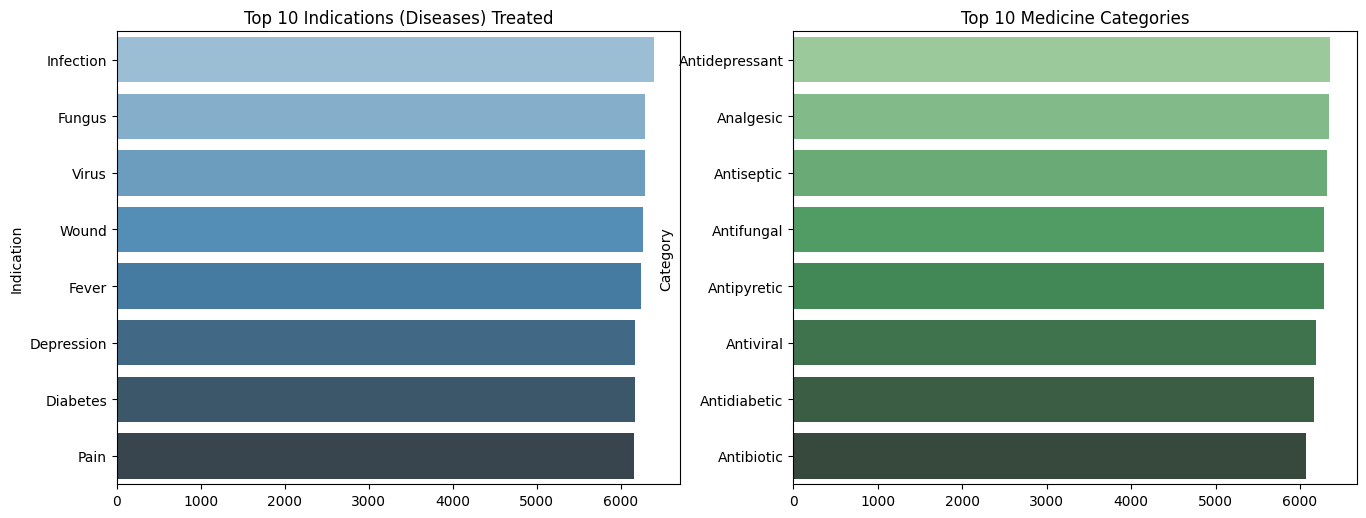

In [6]:
top_diseases = df['Indication'].value_counts().head(10)

# Top medicine categories
category_distribution = df['Category'].value_counts().head(10)

# Classification distribution
classification_distribution = df['Classification'].value_counts()

# Dosage form by disease
dosage_by_disease = df.groupby(['Indication', 'Dosage Form']).size().unstack(fill_value=0)

# Top manufacturers
top_manufacturers = df['Manufacturer'].value_counts().head(10)

# Plotting
plt.figure(figsize=(16, 20))

plt.subplot(3, 2, 1)
sns.barplot(x=top_diseases.values, y=top_diseases.index,hue=top_diseases.index,palette='Blues_d',legend=False)
plt.title("Top 10 Indications (Diseases) Treated")

plt.subplot(3, 2, 2)
sns.barplot(x=category_distribution.values, y=category_distribution.index,hue=category_distribution.index,palette='Greens_d',legend=False)
plt.title("Top 10 Medicine Categories")


Text(0.5, 1.0, 'Classification of Medicines')

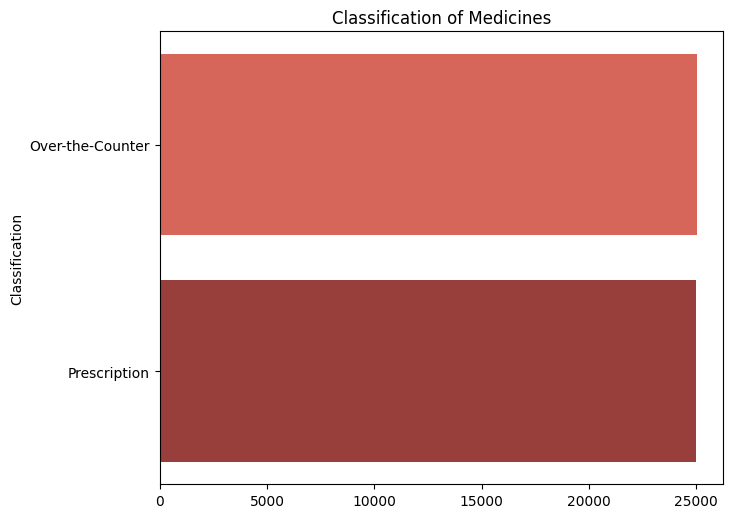

In [7]:
plt.figure(figsize=(16, 20))
plt.subplot(3, 2, 3)
sns.barplot(x=classification_distribution.values, y=classification_distribution.index,hue=classification_distribution.index,palette='Reds_d',legend=False)
plt.title("Classification of Medicines")

Text(0.5, 1.0, 'Dosage Forms by Top 10 Indications')

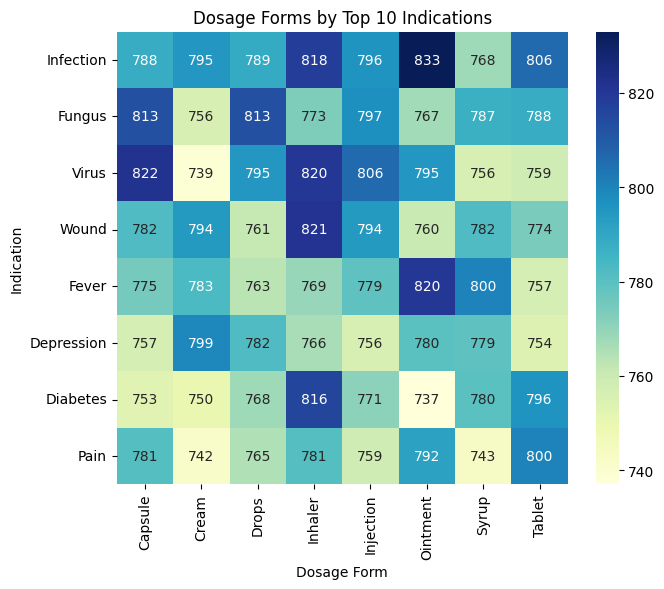

In [8]:
plt.figure(figsize=(16, 20))
plt.subplot(3, 2, 4)
top_dosage_diseases = dosage_by_disease.sum(axis=1).nlargest(10).index
sns.heatmap(dosage_by_disease.loc[top_dosage_diseases], annot=True, fmt='d', cmap='YlGnBu')
plt.title("Dosage Forms by Top 10 Indications")

Text(0.5, 1.0, 'Top 10 Manufacturers')

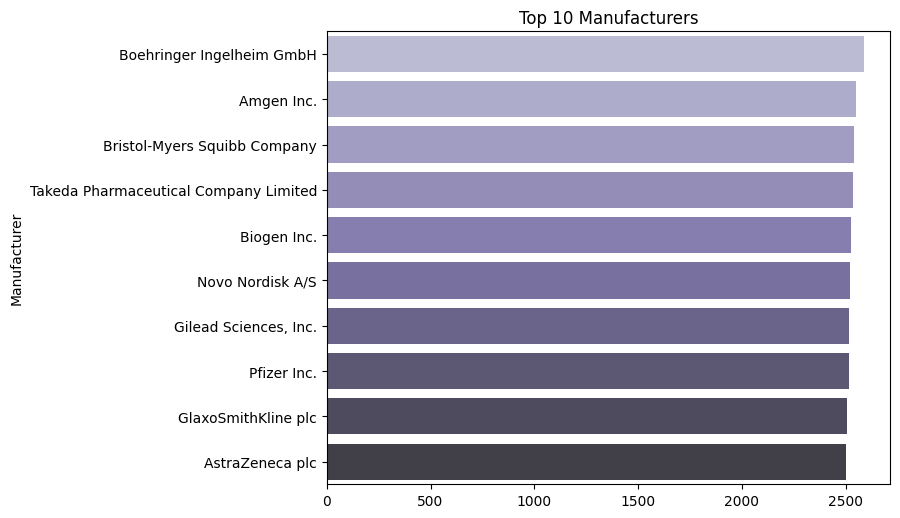

In [9]:
plt.figure(figsize=(16, 20))
plt.subplot(3, 2, 5)
sns.barplot(x=top_manufacturers.values, y=top_manufacturers.index,hue=top_manufacturers.index,palette='Purples_d', legend=False)
plt.title("Top 10 Manufacturers")